In [1]:
import pandas as pd 
traindata = pd.read_csv(r"C:\Users\dell\OneDrive\Bureau\projets\IDS\Train_data.csv")
traindata.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [2]:
cat = [col for col in traindata.columns if traindata[col].dtype == 'object']
print ("Categorical columns: ", cat)
num = [col for col in traindata.columns if traindata[col].dtype != 'object']
print ("Numerical columns: ", num)

Categorical columns:  ['protocol_type', 'service', 'flag', 'class']
Numerical columns:  ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [3]:
print("Number of duplicate rows:", traindata.duplicated().sum())

Number of duplicate rows: 0


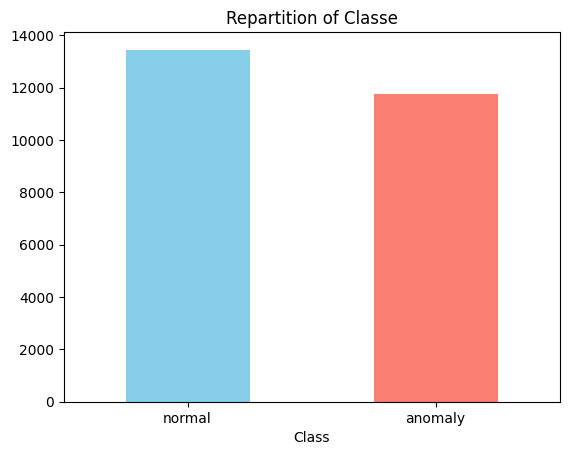

In [4]:
import matplotlib.pyplot as plt
traindata['class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Repartition of Classe")
plt.xlabel("Class")
plt.xticks(rotation = 0)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in cat:
    le = LabelEncoder()
    traindata[col] = le.fit_transform(traindata[col])
print(traindata.head())

   duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   
1         0              2       41     9        146          0     0   
2         0              1       46     5          0          0     0   
3         0              1       22     9        232       8153     0   
4         0              1       22     9        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.

In [6]:
x_train = traindata.drop(['class'], axis=1)
y_train = traindata['class']
print("Label: ",y_train[0])
print("Features: ",x_train[:1])


Label:  1
Features:     duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       19     9        491          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             150                  25   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  0.05   

   dst_host_srv_rerror_rate  
0                       0.0  

[1 rows x 41 columns]


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
print(x_train[0])

[-0.11355066 -0.12606067 -0.64538418  0.75302096 -0.00988885 -0.03930979
 -0.00891048 -0.09122318 -0.00630053 -0.09193335 -0.02622029 -0.80762582
 -0.02187261 -0.03937653 -0.02766547 -0.02172416 -0.02780802 -0.0189046
 -0.04391678  0.          0.         -0.09598961 -0.7202436  -0.35462794
 -0.64014201 -0.63397817 -0.3721856  -0.37309835  0.77210866 -0.34928194
 -0.37388608 -0.32863359 -0.81398452 -0.7791569  -0.2806733   0.07311974
 -0.28799346 -0.64180407 -0.62736475 -0.22166806 -0.37428075]


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.70, random_state=2)

In [9]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)
print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.954633095157083
Test Score: 0.9556761047896268


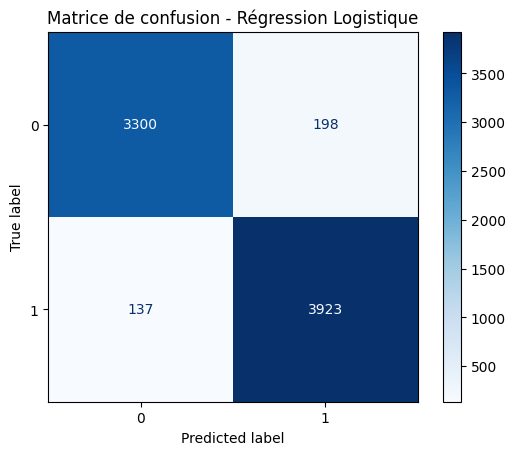

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = lg_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique")
plt.show()


In [11]:
from sklearn.naive_bayes import BernoulliNB
BNB_model = BernoulliNB()
BNB_model.fit(x_train, y_train)
BNB_train, BNB_test = BNB_model.score(x_train , y_train), BNB_model.score(x_test , y_test)
print(f"Training Score: {BNB_train}")
print(f"Test Score: {BNB_test}")

Training Score: 0.895939662016559
Test Score: 0.8946811325747552


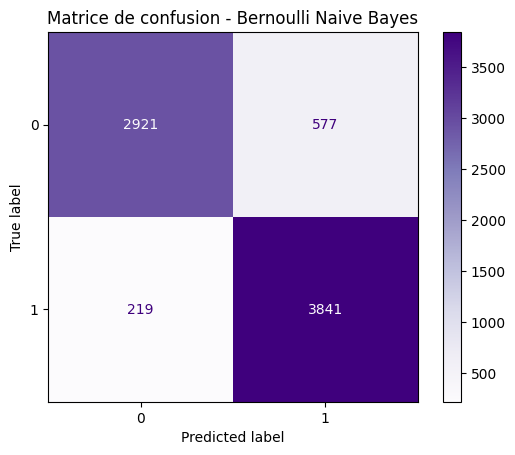

In [12]:
y_pred = BNB_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Matrice de confusion - Bernoulli Naive Bayes")
plt.show()

In [13]:
from tabulate import tabulate
data = [["Logistic Regression", lg_train, lg_test],
        ["Naive Baye Model", BNB_train, BNB_test],]

col_names = ["Model", "Train Score", "Test Score"]
print( tabulate(data, headers=col_names, tablefmt="fancy_grid") )

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ Logistic Regression │      0.954633 │     0.955676 │
├─────────────────────┼───────────────┼──────────────┤
│ Naive Baye Model    │      0.89594  │     0.894681 │
╘═════════════════════╧═══════════════╧══════════════╛
